In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os
from collections import Counter
import requests
import json

# Google API Key
from api_keys import gkey

In [3]:
#setting background of figure black
plt.style.use('ggplot')

In [4]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

## Reading clean California census data for plotting

In [5]:
#reading 2012 clean california census data
path_ca_2012=os.path.join('output_census', 'ca_2012_fg.csv')
ca_2012=pd.read_csv(path_ca_2012)

#reading 2014 clean california census data
path_ca_2014=os.path.join('output_census', 'ca_2014_fg.csv')
ca_2014=pd.read_csv(path_ca_2014)

#reading 2015 clean california census data
path_ca_2015=os.path.join('output_census', 'ca_2015_fg.csv')
ca_2015=pd.read_csv(path_ca_2015)

#reading 2017 clean california census data
path_ca_2017=os.path.join('output_census', 'ca_2017_fg.csv')
ca_2017=pd.read_csv(path_ca_2017)

#reading 2019 clean california census data
path_ca_2019=os.path.join('output_census', 'ca_2019_fg.csv')
ca_2019=pd.read_csv(path_ca_2019)

## California Census 2012 Figures

In [ ]:
#looking 2012 california cleaned data for plotting
ca_2012.head()

In [ ]:
#2012 california cleaned data columns
ca_2012.columns

In [ ]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.4, 
                s=ca_2012['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('rainbow'),
                colorbar=True, ax=ax)

plt.show()

In [ ]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.3, 
                s=ca_2012['Population']/100,label='Population',
                 c='Household Income', cmap=plt.get_cmap('hsv'),
                colorbar=True, ax=ax)

plt.show()

In [ ]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.3, 
                s=ca_2012['Population']/100,label='Population',
                 c='Public Transport Rate', cmap=plt.get_cmap('rainbow'),
                colorbar=True, ax=ax)

plt.show()

In [ ]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Zipcode', y='House Value',alpha=0.3,
             s=ca_2012['Population']/100,c='Public Transport Rate',
             cmap=plt.get_cmap('rainbow'),ax=ax)

plt.show()

In [ ]:
#sns.lmplot(x='City', y='House Value', data=ca_2012, ci=None, order=1);


In [ ]:
#selecting only important columns
ca_12=ca_2012[['City','Population', 'House Value','Household Income',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Uneducated Rate' ]]

In [ ]:
#using groupby method to groupby the data according to city
ca_12=ca_2012.groupby('City').agg({'Population':'sum',
                              'House Value':'mean',
                               'Household Income':'mean',
                               'Poverty Rate':'mean',
                               'Unemployment Rate':'mean',
                               'Monthly Owner Cost':'mean',
                               'Monthly Rent':'mean',
                               'Public Transport Rate':'mean',
                               'Uneducated Rate':'mean'}).reset_index()

In [ ]:
#sorting data according to the population
ca_12=ca_12.sort_values(by=['House Value',
                                'Monthly Owner Cost','Household Income',
                                'Poverty Rate','Unemployment Rate',
                                'Public Transport Rate','Monthly Rent', 
                                'Uneducated Rate' ], ascending=False)

In [ ]:
#plotting all correlation using seaborn heatmap
corr_12=ca_12.corr()
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_12,vmin=-1, vmax=1, ax=ax, cmap='BrBG')#annot=True,
plt.show()

In [ ]:
#city with higher house value
ca_12.nlargest(10, 'House Value')

## California Census 2019 Figures

In [6]:
#looking 2019 california cleaned data for plotting
ca_2019.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [7]:
#2019 california cleaned data columns
ca_2019.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

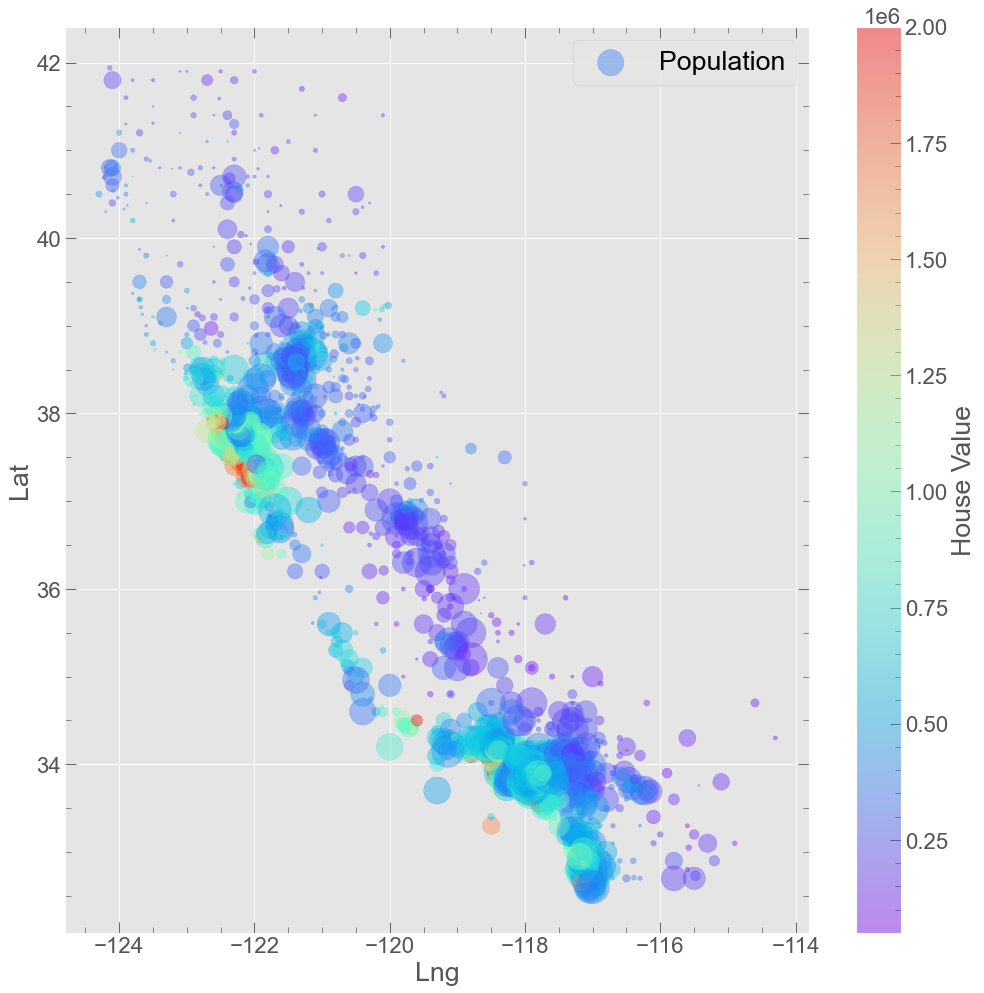

In [8]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2019.plot(kind='scatter', x='Lng', y='Lat', alpha=0.4, 
                s=ca_2019['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('rainbow'),
                colorbar=True, ax=ax)

plt.show()

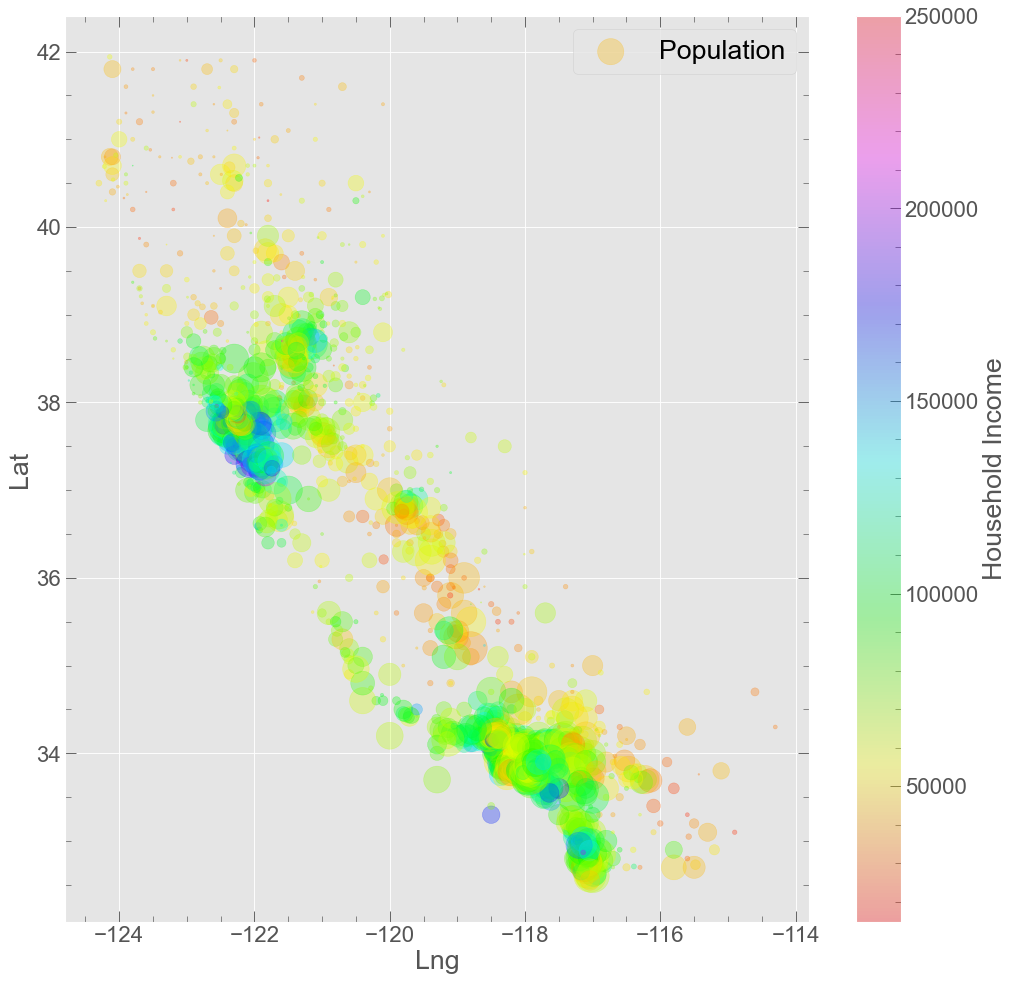

In [9]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2019.plot(kind='scatter', x='Lng', y='Lat', alpha=0.3, 
                s=ca_2019['Population']/100,label='Population',
                 c='Household Income', cmap=plt.get_cmap('hsv'),
                colorbar=True, ax=ax)

plt.show()

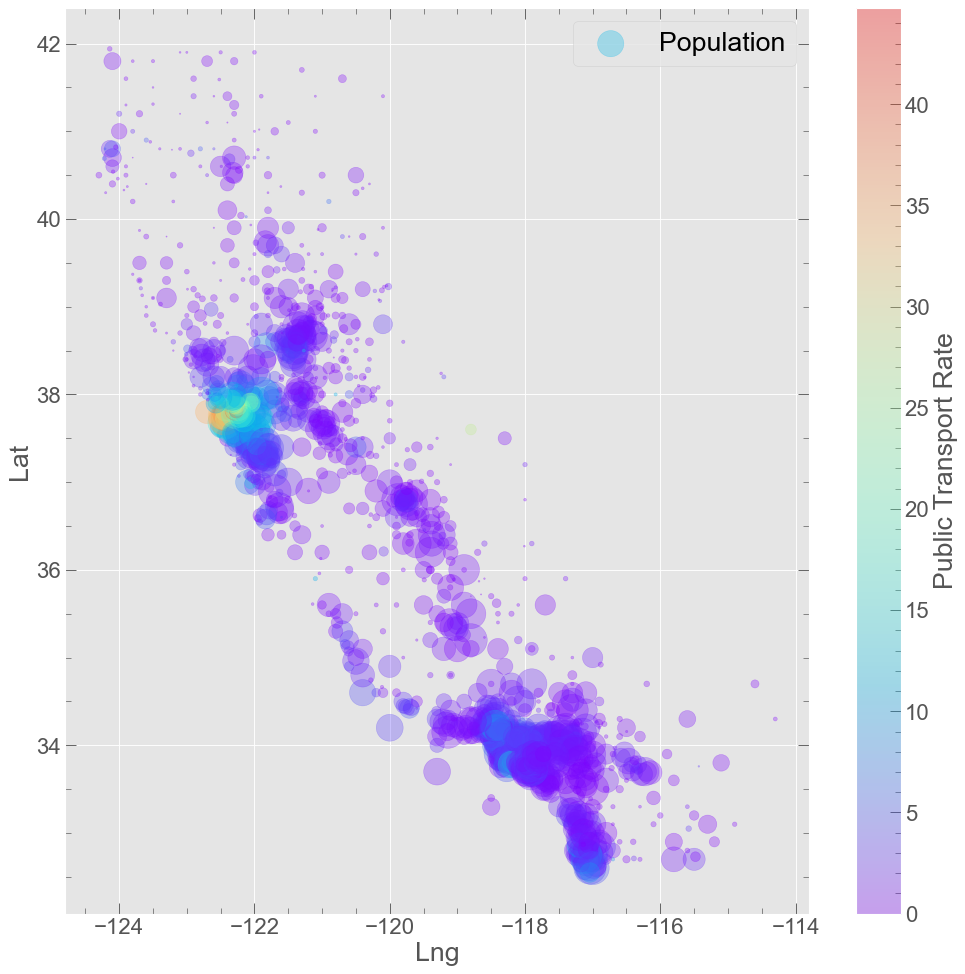

In [10]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2019.plot(kind='scatter', x='Lng', y='Lat', alpha=0.3, 
                s=ca_2019['Population']/100,label='Population',
                 c='Public Transport Rate', cmap=plt.get_cmap('rainbow'),
                colorbar=True, ax=ax)

plt.show()

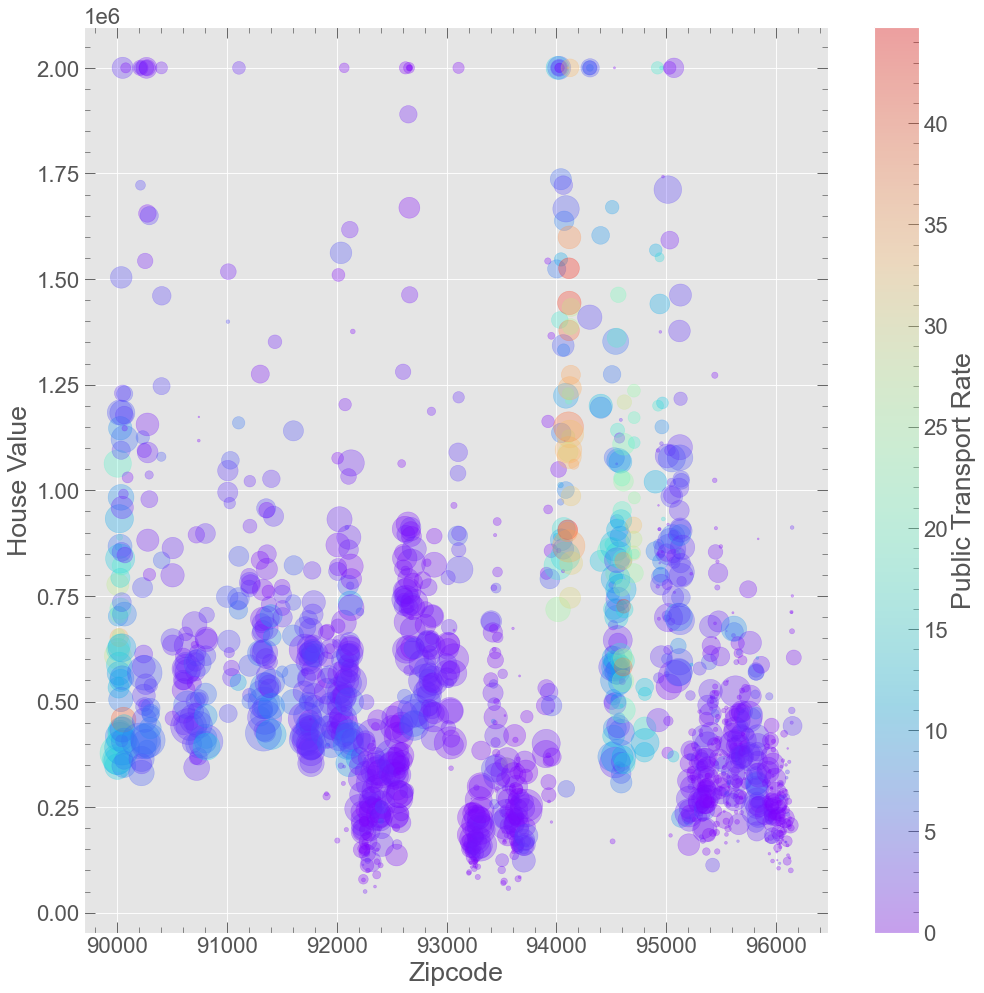

In [11]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2019.plot(kind='scatter', x='Zipcode', y='House Value',alpha=0.3,
             s=ca_2019['Population']/100,c='Public Transport Rate',
             cmap=plt.get_cmap('rainbow'),ax=ax)

plt.show()

In [ ]:
#sns.lmplot(x='City', y='House Value', data=ca_2012, ci=None, order=1);


In [12]:
#selecting only important columns
ca_19=ca_2019[['City','Population', 'House Value','Household Income',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Uneducated Rate' ]]

In [13]:
#using groupby method to groupby the data according to city
ca_19=ca_2019.groupby('City').agg({'Population':'sum',
                              'House Value':'mean',
                               'Household Income':'mean',
                               'Poverty Rate':'mean',
                               'Unemployment Rate':'mean',
                               'Monthly Owner Cost':'mean',
                               'Monthly Rent':'mean',
                               'Public Transport Rate':'mean',
                               'Uneducated Rate':'mean'}).reset_index()

In [14]:
#sorting data according to the population
ca_19=ca_19.sort_values(by=['House Value',
                                'Monthly Owner Cost','Household Income',
                                'Poverty Rate','Unemployment Rate',
                                'Public Transport Rate','Monthly Rent', 
                                'Uneducated Rate' ], ascending=False)

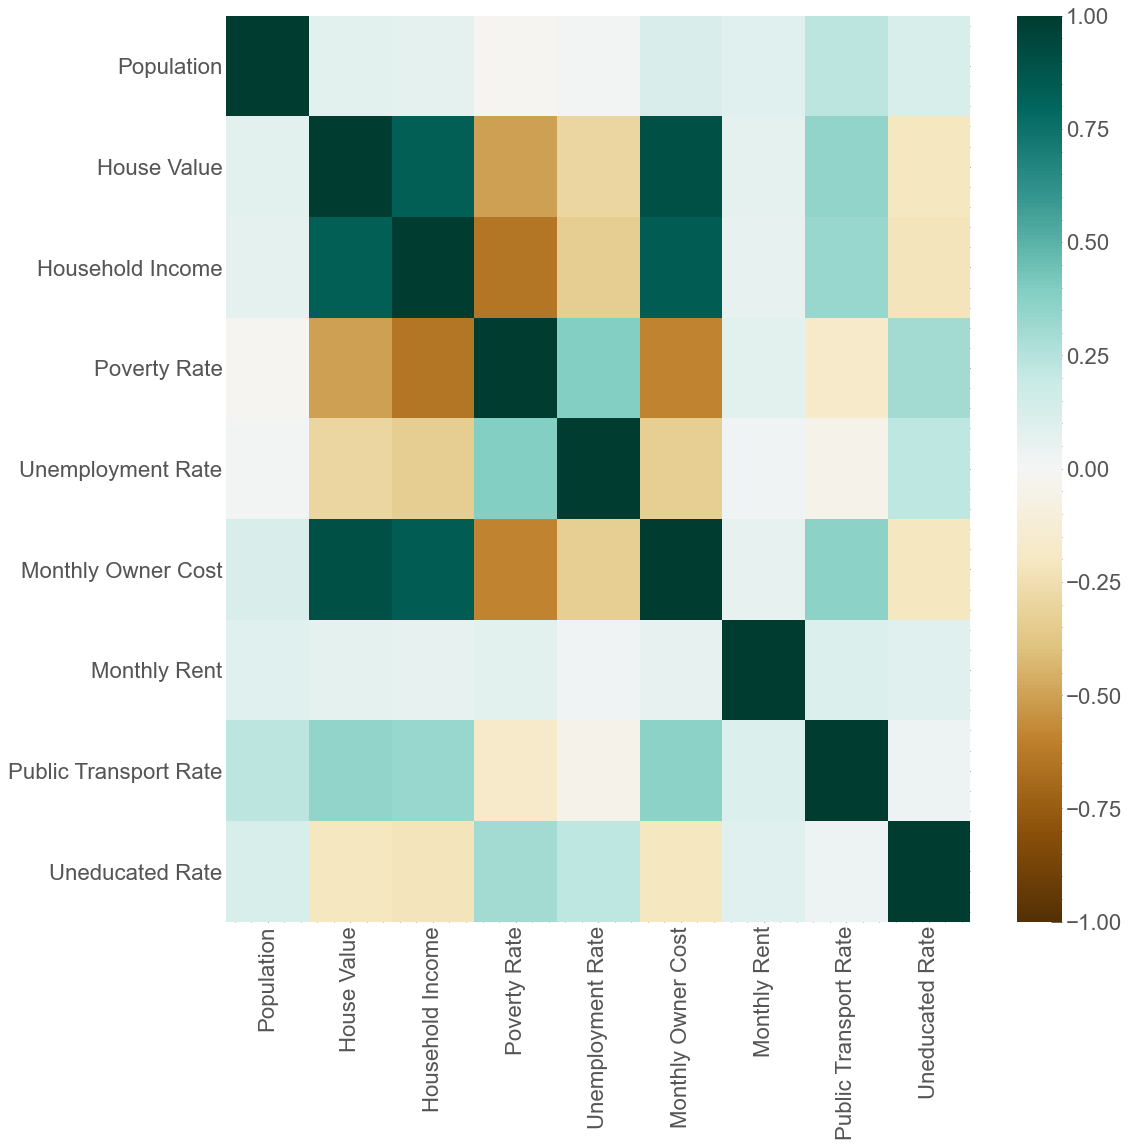

In [15]:
#plotting all correlation using seaborn heatmap
corr_19=ca_19.corr()
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_19,vmin=-1, vmax=1, ax=ax, cmap='BrBG')#annot=True,
plt.show()

In [16]:
#city with higher house value
ca_19.nlargest(10, 'House Value')

,City,Population,House Value,Household Income,Poverty Rate,Unemployment Rate,Monthly Owner Cost,Monthly Rent,Public Transport Rate,Uneducated Rate
730,Ross,1219.0,2000001.0,250001.0,7.301066,2.214930,4001.0,1938.0,15.959596,4.265792
43,Atherton,7415.0,2000001.0,250001.0,3.344572,1.982468,4001.0,3501.0,2.403521,0.364127
477,Los Altos,43081.0,2000001.0,236930.0,3.104511,1.478638,4001.0,3135.5,2.326453,0.293218
684,Portola Valley,7125.0,2000001.0,234091.0,1.431579,1.305263,4001.0,2914.0,0.818505,0.280702
577,Newport Coast,9802.0,2000001.0,204291.0,5.917160,1.101816,4001.0,2623.0,0.000000,0.000000
790,Saratoga,31196.0,2000001.0,193617.0,4.664059,1.689319,4001.0,3098.0,1.156027,0.195538
621,Pacific Palisades,21629.0,2000001.0,192500.0,4.355264,1.733783,4001.0,2537.0,0.753440,0.388367
62,Belvedere Tiburon,12740.0,2000001.0,165807.0,3.092622,2.001570,4001.0,2550.0,16.963332,0.000000
765,San Marino,13375.0,2000001.0,165765.0,6.706542,1.024299,4001.0,3218.0,2.093063,0.328972
521,Menlo Park,43392.0,2000001.0,161827.0,7.151088,1.942754,4001.0,2346.0,6.290406,0.880347
